# 나랑 닮은 연예인을 찾아보자

## 1. 사진 모으기
### 1) 내 사진 찍기

내 사진을 2장 이상 찍은 후, 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구한다. 내 사진까리의 얼굴 임베딩 벡터 거리는 사진의 얼굴이 서로 닮았음을 확인할 수 있는 좋은 기준점이 되기 때문이다. 

우선 이미지를 불러온 후, face_recognition.face_locations를 사용하여 얼굴을 찾고, 임베딩 추출할 이미지를 만들기 위해 잘라준다.

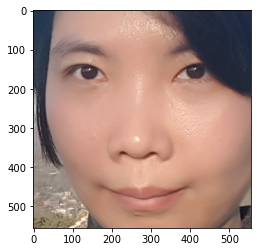

In [1]:
# 패키지 임포드
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

# 이미지 불러오기
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/내사진1.jpg'
image = face_recognition.load_image_file(image_path)


# 얼굴 영역만 잘라주는 함수
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

# 확인
cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

이전 스텝에서 만든 이미지 파일의 얼굴 영역을 가져오는 get_gropped_face() 함수를 활용하여  얼굴 영역의 임베딩 벡터를 구한다. Face Recognition 패키지에서 제공하는 얼굴 임베딩 벡터를 구하는 함수는 face_recognition.face_encodings()이다.

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'

image_file = os.path.join(dir_path, '내사진1.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수(Face Recognition 패키지에서 제공))
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-8.56684297e-02,  1.30744904e-01,  1.07437238e-01, -9.24252123e-02,
        -1.35002941e-01, -3.74329574e-02, -4.32835408e-02, -1.54266447e-01,
         1.66810140e-01, -1.64799705e-01,  2.54844815e-01, -7.18253404e-02,
        -2.42498830e-01, -6.22620322e-02, -6.71570301e-02,  2.17894644e-01,
        -2.41405994e-01, -1.21369898e-01, -6.59985766e-02,  1.06123360e-02,
         7.53177181e-02,  4.94027212e-02,  2.05121115e-02, -6.57143071e-04,
        -1.25016272e-01, -3.92749012e-01, -6.50306717e-02, -5.35358712e-02,
        -5.58415949e-02, -7.90598318e-02, -4.37949784e-02,  4.78518568e-02,
        -1.99912652e-01, -2.51841415e-02, -2.97266059e-04,  8.15841779e-02,
        -1.08136237e-02, -8.09465423e-02,  9.69387591e-02, -1.46092279e-02,
        -2.84218788e-01,  3.18523869e-02,  4.20482196e-02,  2.38629341e-01,
         1.80615649e-01, -8.28499869e-02,  1.76030360e-02, -1.33340284e-01,
         1.10018790e-01, -1.73483342e-01, -8.03360641e-02,  9.34741423e-02,
         4.7

images 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수를 하나 만든다. 딕셔너리의 각 엘리먼트는 ```사람 이름:임베딩벡터```로 한다.

In [3]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file) # 경로를 병합하여 새 경로 생성
        try: 
            face = get_gropped_face(img_path)    # 얼굴 영역만 자른 이미지
        except:                                  # 인식하지 못하는 이미지는 건너뜀
            continue
            
        embedding = get_face_embedding(face)   # 얼굴 영역에서 얼굴 임베딩 벡터를 구함
        if len(embedding) > 0:   # 얼굴 영역이 제대로 detect되지 않았을 경우를 대비
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담긴다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
       
        
    return embedding_dict

In [4]:
# 제대로 만들어졌는지 확인
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['내사진4']

array([-0.15170301,  0.08890939,  0.08690679, -0.06924456, -0.11328037,
       -0.06634196, -0.00463655, -0.11123078,  0.16452995, -0.09621949,
        0.25437582, -0.10126746, -0.21984002, -0.08774511, -0.08483978,
        0.23022233, -0.20448662, -0.11316644, -0.06483234, -0.01415515,
        0.1272486 ,  0.03708485,  0.01115857,  0.01158448, -0.11773057,
       -0.38512981, -0.08003788, -0.08482429, -0.06411555, -0.06082315,
       -0.01926463,  0.05222275, -0.2078006 , -0.06404556,  0.01226648,
        0.09207369, -0.01846877, -0.10086617,  0.1439968 , -0.01291633,
       -0.24499168,  0.01128286,  0.08973581,  0.20113648,  0.17859159,
       -0.02102154,  0.0429599 , -0.17391659,  0.15807021, -0.16535658,
       -0.06047462,  0.12081518,  0.0586878 ,  0.04183184,  0.01920632,
       -0.10359745,  0.01872006,  0.14767385, -0.14180237, -0.02339051,
        0.10186779, -0.11955969, -0.05342489, -0.10844736,  0.20231484,
        0.06686521, -0.12461936, -0.16326734,  0.15894558, -0.09

이 부분에서 시간이 꽤 오래 걸린다. 임베딩 딕셔너리를 만드는 데는 시간이 얼마 안 거리는데, 임베딩 딕셔너리를 확인하는 데에는 왜 시간이 많이 걸리는지 궁금했다.

np.linalg.norm를 활용하여 두 임베딩 벡터 간의 거리를 계산하는 함수를 구현한다. 아래의 get_distance() 함수는 인자로 파일명의 사람 이름 2개를 받아서, 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구하는 형태이다.

In [5]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('내사진1', '내사진2')

0.4329257616340542

In [6]:
get_distance('내사진1', '내사진4')

0.3767118393107363

In [7]:
get_distance('내사진1', '내사진5')

0.2699617465459469

다양한 사진을 가지고 와 내사진1과 비교해 보았다. 내사진1과 3장의 사진의 임베딩 벡터 간 거리는 모두 0.5이하이다. 내사진1과 내사진2의 거리가 다른 사진들보다 먼 이유는 내사진2가 안경을 끼고 있기 때문이다. 

### 2) 비교할 연예인 사진 모으기
비교할 연예인의 사진을 많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아진다고 한다. 슬랙에 고맙게도 퍼실님이 연예인 사진을 올려주셔서 그 사진들로 하기로 했다.  

## 2. 얼굴 영역 자르기
임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 한다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_gropped_face(image_file)을 통해서 잘라준다. 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두어 다양한 재미있는 시각화를 시도하는데 사용할 수 있다.

In [8]:
from PIL import Image

# 이미지 불러오기
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/images/cropped_imgs'


def get_gropped_face_to_save(dir_path, path_to_save):
    file_list = os.listdir(dir_path)
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        try:
            face = get_gropped_face(img_path)
        except: continue
            
        pillow_image = Image.fromarray(face)   # PIL Image로 변환
        pillow_image.save(path_to_save + os.path.splitext(file)[0])

## 3. 얼굴 영역의 임베딩 추출하기
얼굴 영역으로 잘린 이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출한다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장한다. 

In [9]:
# 얼굴 영역으로부터 얼굴 임베딩 벡터를 구하는 함수(Face Recognition 패키지에서 제공))
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 확인
face = get_gropped_face(os.path.join(dir_path, 'obama.jpg')) 
embedding = get_face_embedding(face)  
embedding

[array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
        -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
         0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
         0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
         0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
        -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
        -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
        -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
        -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
         0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
         0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
        -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
         0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
         0.10299795, -0.12437531, -0.0490516 ,  0.1

In [10]:
# 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file) # 경로를 병합하여 새 경로 생성
        try: 
            face = get_gropped_face(img_path)    # 얼굴 영역만 자른 이미지
        except:                                  # 인식하지 못하는 이미지는 넘어간다.
            continue
            
        embedding = get_face_embedding(face)   # 얼굴 영역에서 얼굴 임베딩 벡터를 구함
        if len(embedding) > 0:   # 얼굴 영역이 제대로 detect되지 않았을 경우를 대비
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담긴다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
       
    return embedding_dict

인식하지 못하는 연예인 사진 이미지를 모두 지울 수 없어서 슬랙에 올라온 글을 참고하였지만 잘 안 되었다. 조원의 도움으로 이 부분을 try-except로 해결할 수 있었다. 

In [11]:
# 제대로 만들어졌는지 확인
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['솔라']

array([-0.11611858,  0.09680796,  0.05414825, -0.13819852, -0.0996763 ,
       -0.06486122, -0.11354907, -0.06375778,  0.1945135 , -0.17366713,
        0.23964366, -0.12292905, -0.19784103,  0.02584339,  0.03605783,
        0.1913273 , -0.20803162, -0.09583461, -0.0364862 ,  0.0174202 ,
        0.10081605,  0.05231626,  0.01147156,  0.03240613, -0.14166076,
       -0.3798514 , -0.13894106, -0.04606603, -0.01730431, -0.03762778,
        0.0023915 ,  0.03836724, -0.19062927, -0.02088338,  0.00933131,
        0.17429408, -0.02655165, -0.06727159,  0.13378711, -0.01714559,
       -0.31222695,  0.00491658,  0.06067458,  0.24787295,  0.17006105,
        0.05385127, -0.02359219, -0.09414117,  0.06542117, -0.1749638 ,
        0.03444561,  0.1051622 ,  0.04585684,  0.04675151,  0.07931791,
       -0.09021671,  0.10219938,  0.1347391 , -0.23312621, -0.07937421,
        0.13591112, -0.094607  ,  0.06177058, -0.08610609,  0.29401422,
        0.08646888, -0.11302091, -0.16873075,  0.11932161, -0.14

## 4. 모은 연예인들과 비교하기
모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아본다.

In [12]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 한다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama')라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산
# name1가 저장된  get_distance_from_name1 함수가 sort_key_func(skf) 변수에 저장

입력받은 임의의 이름에 대해 다른 이미지의 임베딩 거리를 정렬해서 적절히 출력한다. 내사진1외의 내 사진이 3장 더 들어갔으므로 top=8로 하였다. 

In [13]:
def get_nearest_face(name, top=8):
    sort_key_func = get_sort_key_func(name)  
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
          if i == 0:                 # 첫번째로 나오는 이름은 자기 자신이므로 제외
              continue
          if sorted_faces[i]:
                print('순위 {} : 이름({}), 거리({})'. format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [14]:
# 나와 가장 닮은 사람은 누굴까요?
get_nearest_face('내사진1')

순위 1 : 이름(내사진5), 거리(0.2699617465459469)
순위 2 : 이름(내사진4), 거리(0.3767118393107363)
순위 3 : 이름(내사진2), 거리(0.4329257616340542)
순위 4 : 이름(공효진), 거리(0.4733752624440276)
순위 5 : 이름(케이), 거리(0.4833726644402756)
순위 6 : 이름(아이유), 거리(0.49661426680195536)
순위 7 : 이름(장도연), 거리(0.5210655395308794)
순위 8 : 이름(러블리즈지수), 거리(0.5216418938419171)


In [15]:
# 나와 가장 닮은 사람은 누굴까요?
get_nearest_face('내사진2')

순위 1 : 이름(내사진4), 거리(0.3543627414855157)
순위 2 : 이름(봉준호), 거리(0.3994710828863322)
순위 3 : 이름(내사진1), 거리(0.4329257616340542)
순위 4 : 이름(하현우), 거리(0.4336696687769475)
순위 5 : 이름(목진화), 거리(0.4448369294518946)
순위 6 : 이름(최양락), 거리(0.450107654908068)
순위 7 : 이름(돈스파이크), 거리(0.4512237714514923)
순위 8 : 이름(손예진), 거리(0.4534023167189365)


In [16]:
# 나와 가장 닮은 사람은 누굴까요?
get_nearest_face('내사진4')

순위 1 : 이름(내사진5), 거리(0.32693835379826613)
순위 2 : 이름(내사진2), 거리(0.3543627414855157)
순위 3 : 이름(내사진1), 거리(0.3767118393107363)
순위 4 : 이름(RM), 거리(0.4447074096823551)
순위 5 : 이름(케이), 거리(0.4505868126793342)
순위 6 : 이름(이대형), 거리(0.4588820435335674)
순위 7 : 이름(주진모(올드)), 거리(0.4690557043787646)
순위 8 : 이름(박보영), 거리(0.4722577622488764)


In [17]:
# 나와 가장 닮은 사람은 누굴까요?
get_nearest_face('내사진5')

순위 1 : 이름(내사진1), 거리(0.2699617465459469)
순위 2 : 이름(내사진4), 거리(0.32693835379826613)
순위 3 : 이름(내사진2), 거리(0.46157751749740444)
순위 4 : 이름(장도연), 거리(0.4805571667909826)
순위 5 : 이름(케이), 거리(0.48757462400445767)
순위 6 : 이름(조이), 거리(0.5206619055616837)
순위 7 : 이름(공효진), 거리(0.5285352439917534)
순위 8 : 이름(아이유), 거리(0.5369279093926776)


4장의 내사진과 연예인 사진을 비교하여 닮은 꼴을 찾았다. 같은 사람인데도 사진에 따라서 닮은 꼴이 달리지며, 내사진2의 경우는 내사진보다 연예인 사진이 더 임베딩 벡터간 거리가 가까운 것을 알 수 있다. 

## 5. 다양한 재미있는 시각화 시도해 보기
노드에 나온 사진이나 시중에 나온 닮은 연예인 찾기 앱에서 얼굴 합성하는 것을 보고 내 사진과 닮은 꼴 연예인의 사진을 합성해 보기로 했다. 내 사진 1과 가장 거리가 가까운 여자 연예인인 공효진과 합성하기로 했다. 얼굴만 자른 이미지를 불러와 cv2.addWeighted()를 사용하여 두 이미지를 블렌딩하였다. 

In [21]:
import cv2
# 이미지 불러오기
image_path2 = os.getenv('HOME')+'/aiffel/face_embedding/images/공효진.jpg'
w = cropped_face.shape[1]
h = cropped_face.shape[0]
cropped_face3 = get_gropped_face(image_path2)
cropped_face4 = cv2.resize(cropped_face3, (w,h))

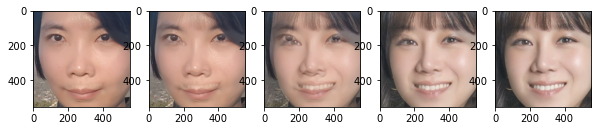

In [22]:
added_image1 = cv2.addWeighted(cropped_face, 0.9,cropped_face4,0.1, 0)
added_image2 = cv2.addWeighted(cropped_face, 0.8,cropped_face4,0.2, 0)
added_image3 = cv2.addWeighted(cropped_face, 0.5,cropped_face4,0.5, 0)
added_image4 = cv2.addWeighted(cropped_face, 0.2,cropped_face4,0.8, 0)
added_image5 = cv2.addWeighted(cropped_face, 0.1,cropped_face4,0.9, 0)

plt.figure(figsize=(10,10))

plt.subplot(151)
plt.imshow(added_image1)

plt.subplot(152)
plt.imshow(added_image2)

plt.subplot(153)
plt.imshow(added_image3)

plt.subplot(154)
plt.imshow(added_image4)

plt.subplot(155)
plt.imshow(added_image5)


plt.show()

# 루브릭
- 평가문항
1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.(닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.)              
: 내사진1과 가장 닮은 연예인 best 5는 공효진, 케이, 아이유, 장도연, 러블리즈지수이다. 나머지 3장의 사진에서도 가장 닮은 연예인 best 5를 구할 수 있었다.  


2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.(다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.)           
: 가장 닮은 연예인 best 5의 대부분이 임베딩 거리 0.5 이내였다. 내사진1의 경우, 공효진, 케이, 아이유가 0.5 이내의 결과를 보여준다.     


3. matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.        
: matplotlib과 cv2.addWeighted()를 이용하여 내 얼굴과 닮은 꼴인 연예인의 사진을 하나 골라 이미지 블렌딩을 하였다. 

# 후기
- 이번 프로젝트에서 어려웠던 점  
  - 이미지를 인식하지 못해 임베딩을 딕셔너리에 넣는 부분에서 에러 메시지가 나왔다. 슬랙에 올려주신 글을 참고하여 시도하였으나 잘 되지 않았다. 결국 조원들에게 질문하여 try-except를 사용하여 해결하였다. 
  - 시각화하는 부분이 어려웠다. matplotlib를 사용하여 이미지를 여러 개 출력하고 싶었으나 잘 되지 않아 시간이 많이 걸렸다. 쉬운 방법을 찾아 해결하였으나 더 좋은 방법을 사용할 수 있을 것 같아 아쉽다. 


- 프로젝트를 진행하면서 알게 된 점           
  - try-except문이 어떤 상황에서 사용되는지 알게 되었다.
  
  
- 프로젝트를 진행하면서 아직 모호한 점    
  - 시각화에서 아쉬운 것은 코드를 길게 썼다는 점이다. 블렌딩한 5장의 이미지와 이미지를 여러 장 출력하는 부분을 for문으로 축약할 수 있을 것 같은데, 그 방법을 잘 몰라서 길게 쓸 수밖에 없었다(for문을 사용하였으나 에러 메시지가 나왔다). 
  - 노드에는 "tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것이다."라고 써 있으나 이 말의 의미를 잘 모르겠어서 시도하지 못하였다.
  - 노드에는 "자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두어 다양한 재미있는 시각화를 시도하는데 사용할 수 있다."라고 써 있는데, 어떻게 사용하여 시각화하는지 잘 모르겠다.            
  - 임베딩 딕셔너리를 만드는데는 시간이 얼마 안 걸리는데, 제대로 만들었는지 확인하는 데에서는 시간이 오래 걸렸다. 왜 그런 것인지 궁금하다.   


- 자기 다짐        
이번 프로젝트를 통해 시중에 나온 닮은꼴 사진 앱에 대한 실마리를 알게 되어 재미있었다. 그러나 여전히 프로젝트를 혼자서 하기에는 벅차다는 것을 깨닫는다. 검색을 하여 필요한 코드를 발견하여도 제대로 사용하지 못하는 경우가 많다. 또한 코드를 간략하게 작성하는 것도 아직까지는 미숙하다. 앞으로 코드 구현에 대해 공부를 더 해야할 것 같다. 

내사진2와 남자 연예인의 사진의 임베딩 거리가 무척 가까운 것을 보고 놀랐다. 내사진보다도 임베딩 거리가 가까워서 당황했다.